In [42]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [43]:
#Load the dataset
df = pd.read_csv('C:/Users/singh/Desktop/TIP_2/fraudTest.csv', on_bad_lines='skip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [44]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,31-12-2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,13-02-1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,31-12-2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,27-12-1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,31-12-2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,29-11-1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,31-12-2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,15-12-1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [45]:
#Display the data
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [46]:
#Sum the missing value
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [47]:

# Drop the first column
df.drop(df.columns[0], axis=1, inplace=True)

In [48]:
#Summary the description of the dataset
df.describe()
#Sum the missing value
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Data Pre-processing

In [49]:
# Split the 'trans_date_trans_time' into 'trans_date' and 'trans_time'
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M').dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M').dt.time

# Remove the 'trans_date_trans_time' column and 'Unnamed: 0' if it exists
df.drop(columns=['trans_date_trans_time', 'Unnamed: 0'], errors='ignore', inplace=True)

# Reorder the columns to have 'trans_date' first and 'trans_time' second
columns = ['trans_date', 'trans_time'] + [col for col in df.columns if col not in ['trans_date', 'trans_time']]
df = df[columns]

# Convert 'dob' to datetime
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')

# Check the data types
print("\nData types of the columns:")
print(df.dtypes)

plt.figure(figsize=(14, 8))
# Filter for transactions where is_fraud is 1
df_fraud = df[df['is_fraud'] == 1]

# Print columns of df_fraud to check column names and existence
print(df_fraud.columns)


Data types of the columns:
trans_date            object
trans_time            object
cc_num               float64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object
Index(['trans_date', 'trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


<Figure size 1400x800 with 0 Axes>

In [ ]:

df.head()

# EDA

In [50]:
#Distribute the class
df[('is_fraud')].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

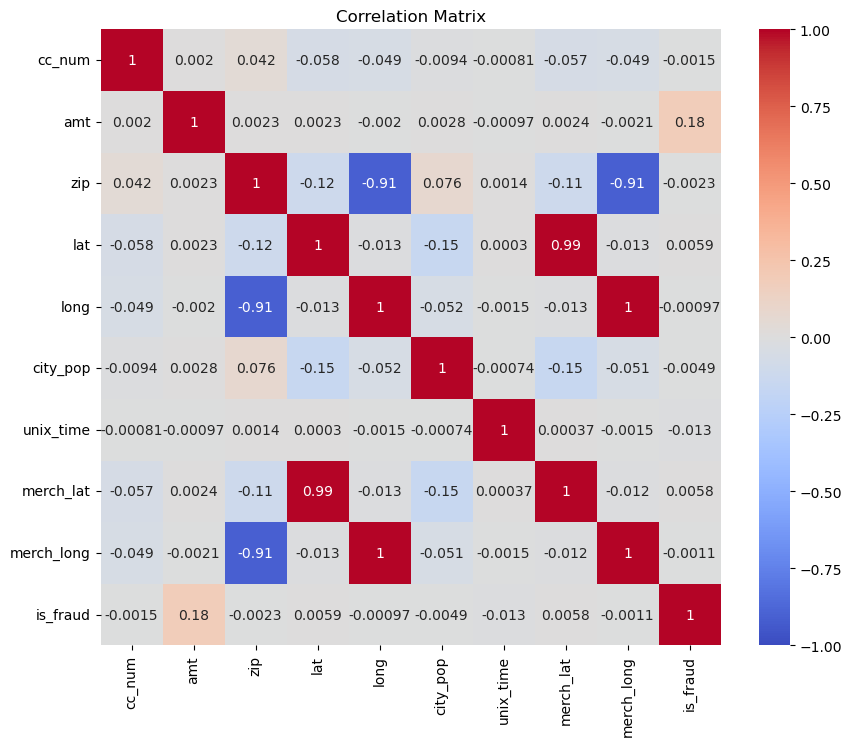

In [52]:
# Select only numeric columns for correlation calculation
numeric_columns = ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
df_numeric = df[numeric_columns]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

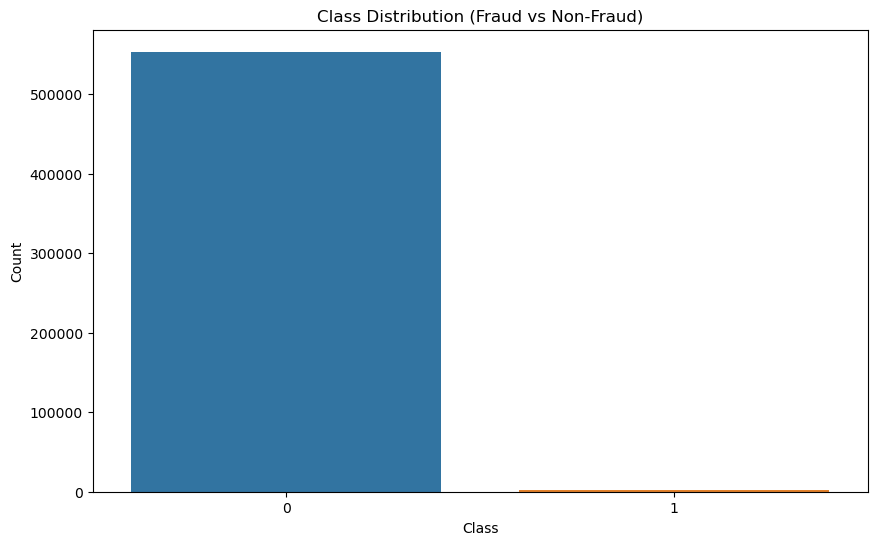

In [53]:
## Feature 1 "is_fraud"
# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='is_fraud', data=df)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

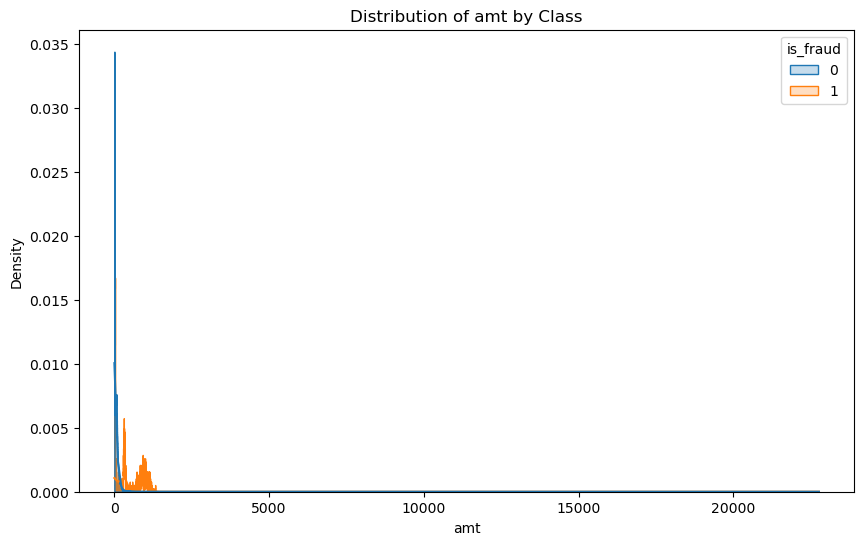

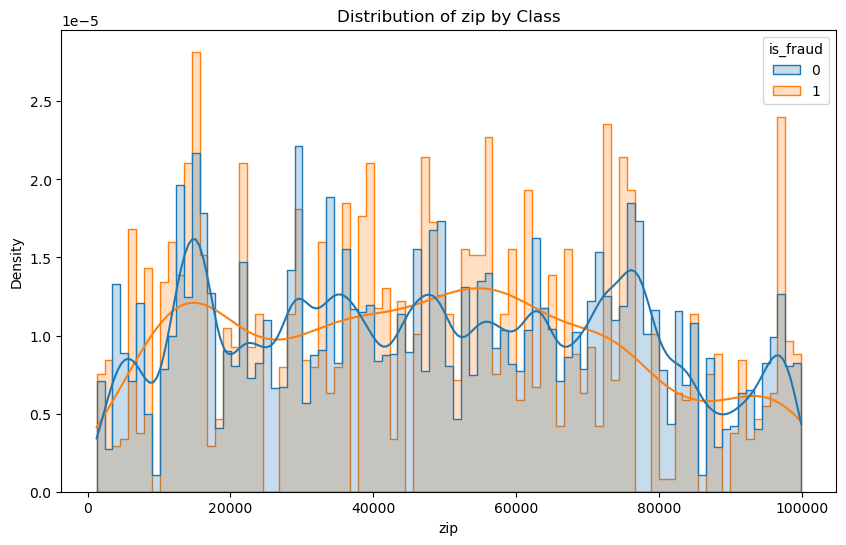

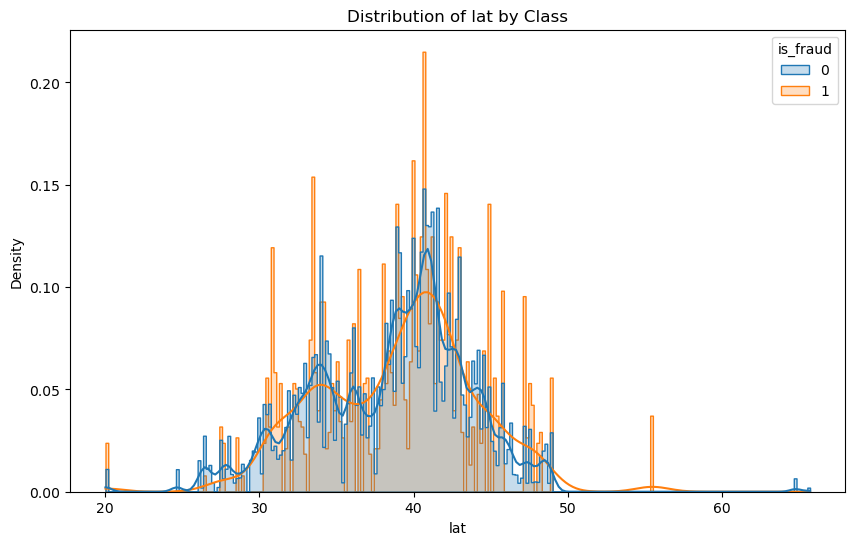

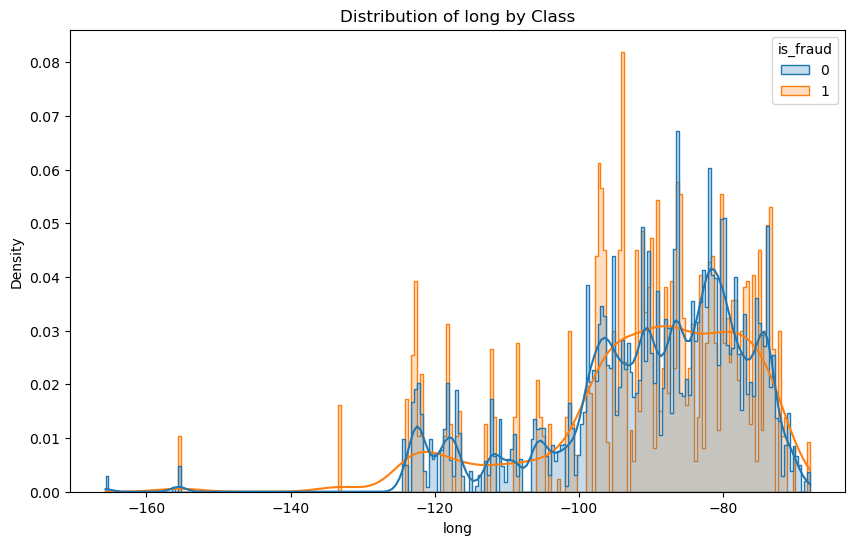

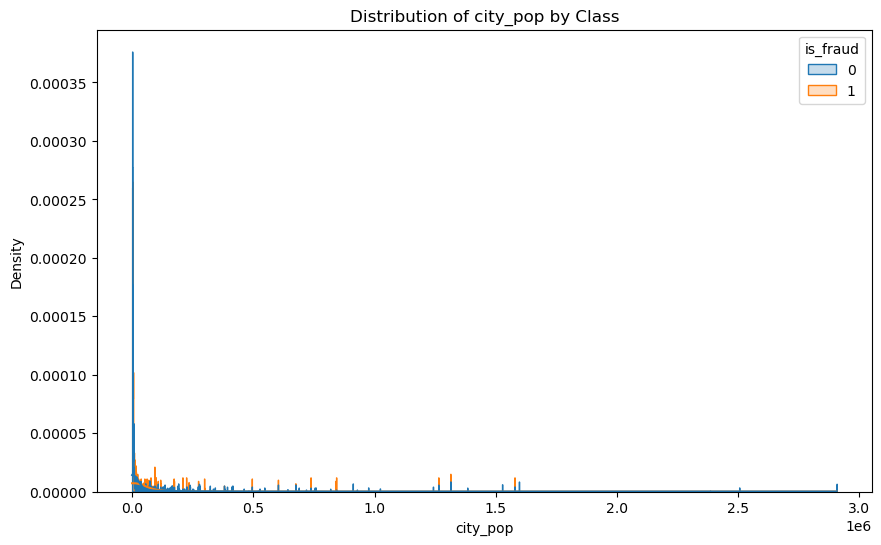

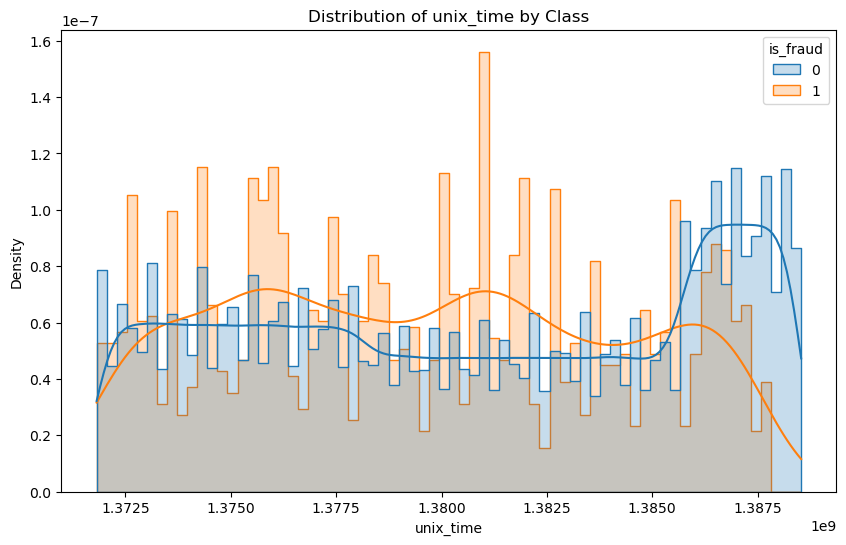

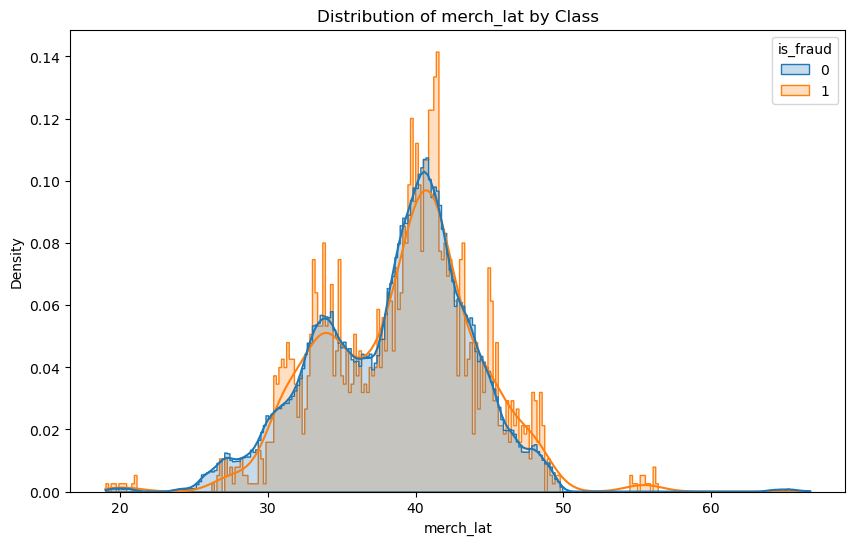

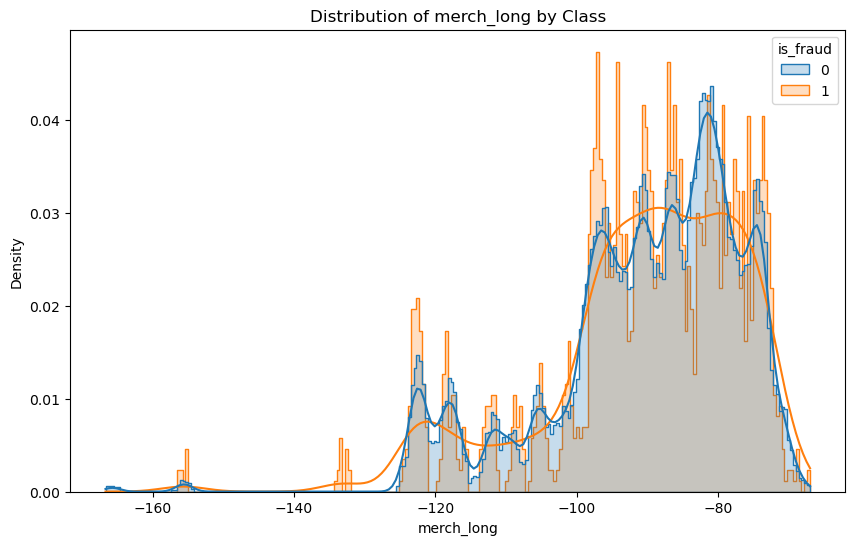

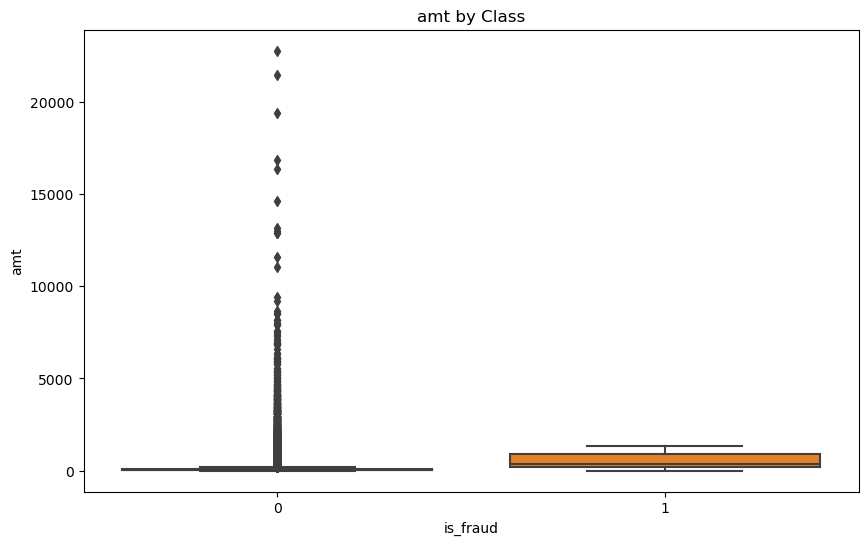

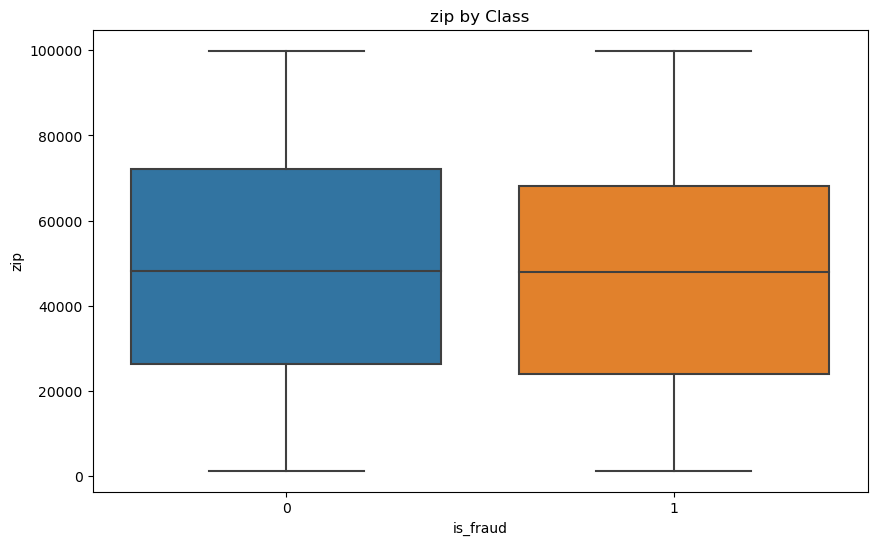

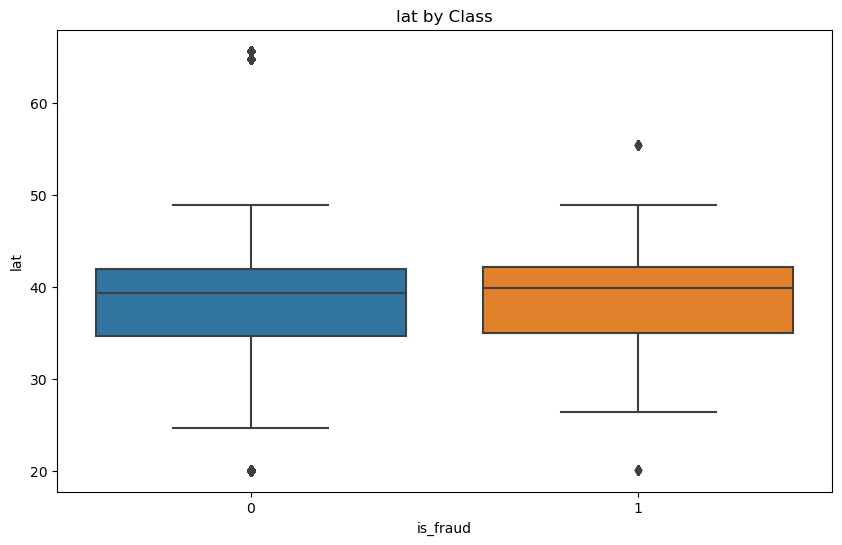

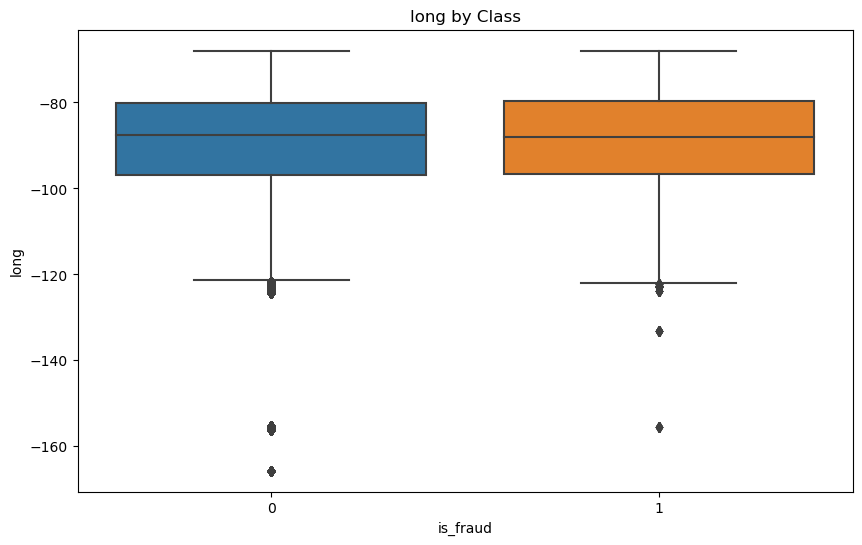

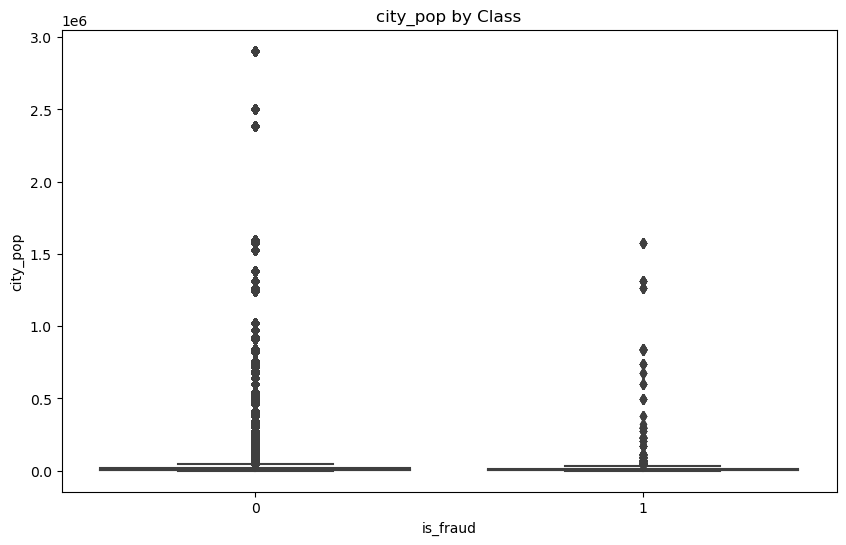

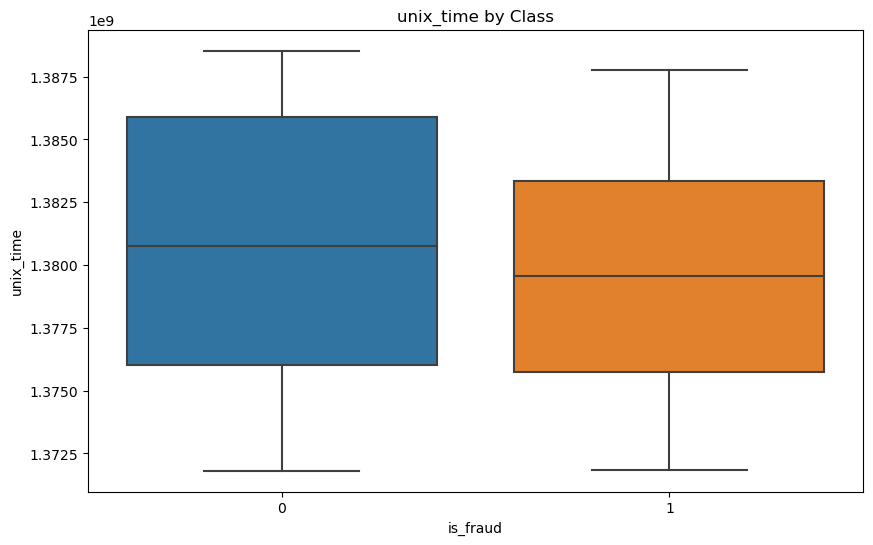

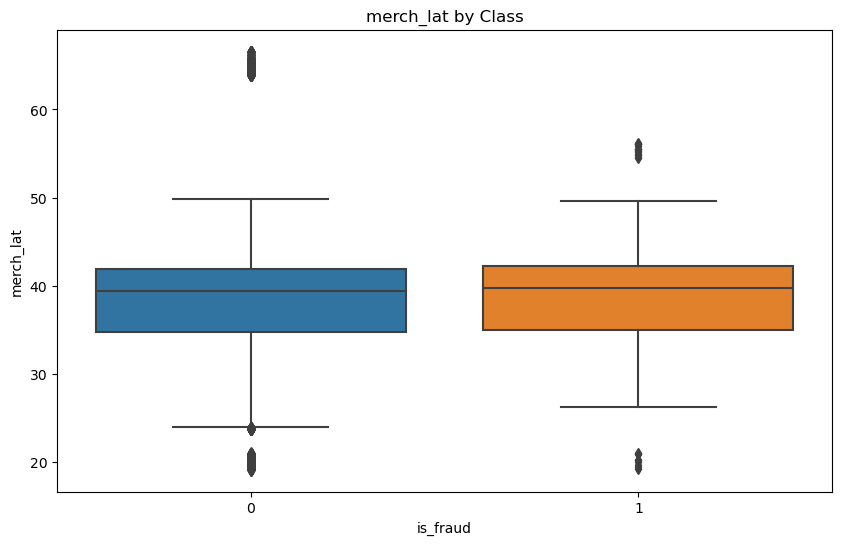

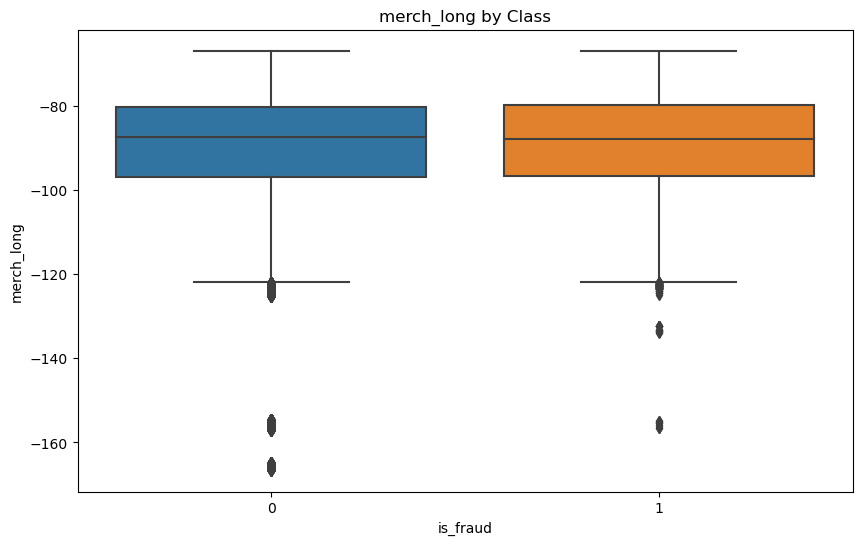

In [54]:
##Feature "is_fraud" against features - 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long'
# Function to plot the distribution of features based on class
def plot_feature_distribution(df, features):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=feature, hue='is_fraud', kde=True, element="step", stat="density", common_norm=False)
        plt.title(f'Distribution of {feature} by Class')
        plt.show()

# List of features to plot
features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Plot the distributions
plot_feature_distribution(df, features)

# Function to plot boxplots of features based on class
def plot_feature_boxplots(df, features):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='is_fraud', y=feature, data=df)
        plt.title(f'{feature} by Class')
        plt.show()

# Plot the boxplots
plot_feature_boxplots(df, features)

In [58]:
# Convert 'trans_date' to datetime format
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Extract month and year from 'trans_date'
df['trans_month_year'] = df['trans_date'].dt.to_period('M')

print(df['trans_date'].dtype)


datetime64[ns]


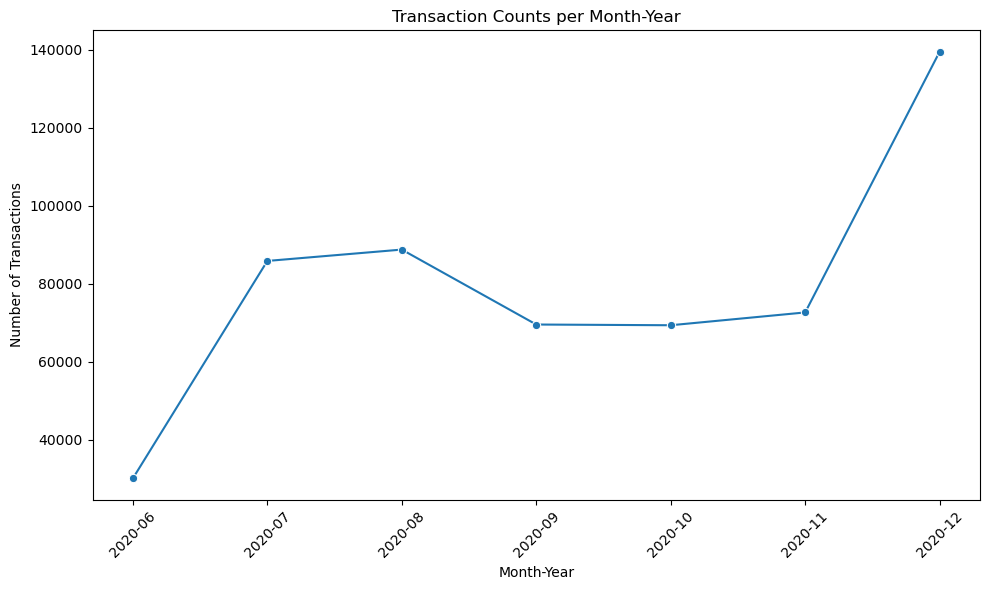

In [59]:
## Feature 2 trans_date
# EDA based on trans_month_year 
# Example: Count of transactions per month and year
transaction_counts = df['trans_month_year'].value_counts().sort_index()

# Plotting transaction counts over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=transaction_counts.index.astype(str), y=transaction_counts.values, marker='o')
plt.xticks(rotation=45)
plt.title('Transaction Counts per Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

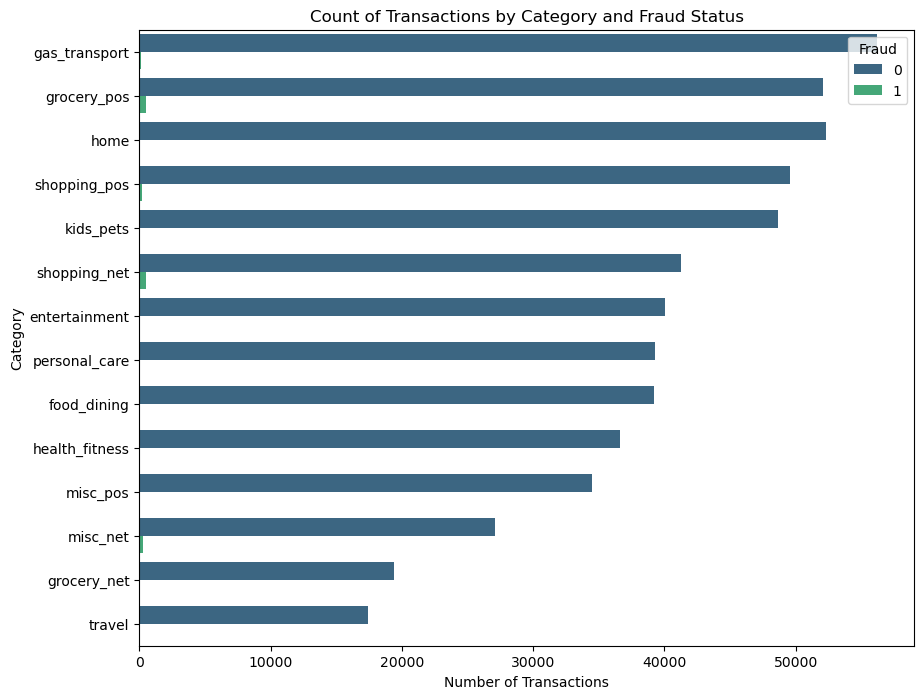

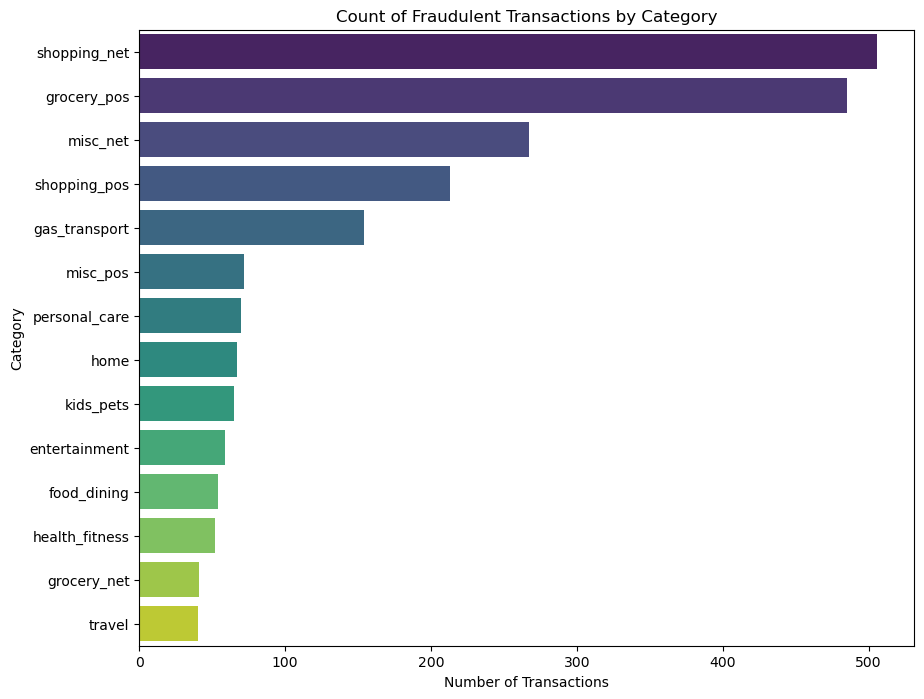

In [62]:
##Feature by category , by category vs is_fraud
# Plotting the horizontal bar plot for transactions by category
plt.figure(figsize=(10, 8))

# Countplot for both fraudulent and non-fraudulent transactions
sns.countplot(y='category', hue='is_fraud', data=df, palette='viridis', order=df['category'].value_counts().index)

plt.title('Count of Transactions by Category and Fraud Status')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.legend(title='Fraud', loc='upper right')
plt.show()


# Filter the DataFrame for fraudulent transactions
df_fraud = df[df['is_fraud'] == 1]
# Plotting the horizontal bar plot for fraudulent transactions by category
plt.figure(figsize=(10, 8))
# Countplot for fraudulent transactions
sns.countplot(y='category', data=df_fraud, palette='viridis', order=df_fraud['category'].value_counts().index)
plt.title('Count of Fraudulent Transactions by Category')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.show()

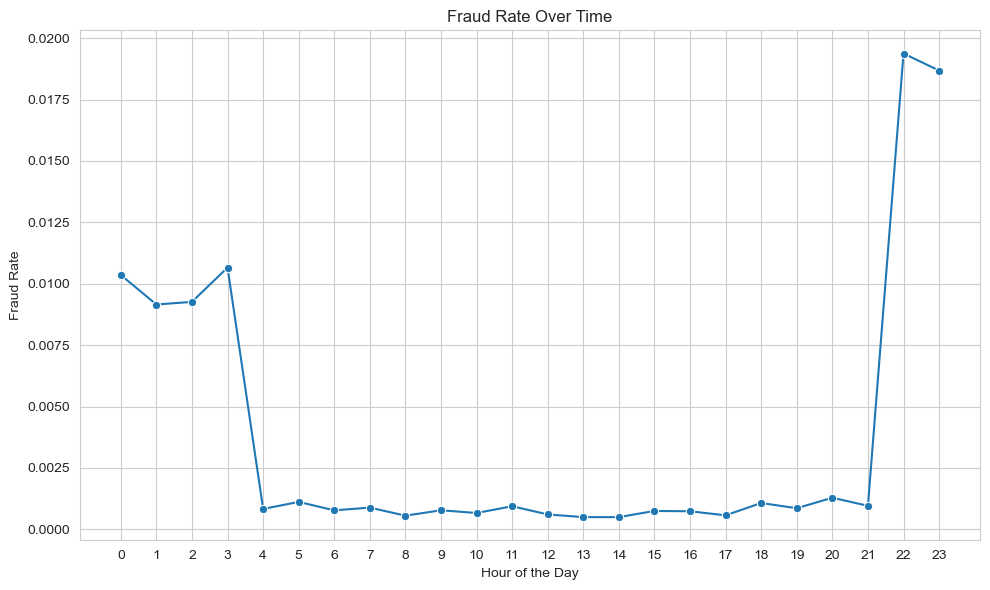

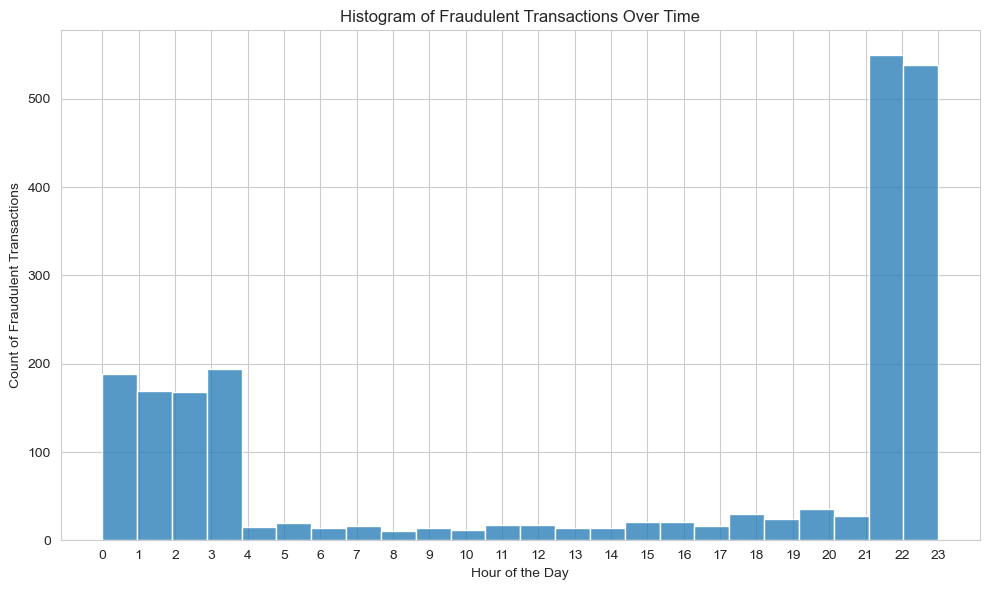

In [80]:
## Feature - trans_time 
# Assuming 'is_fraud' column exists
fraud_by_hour = df.groupby(df['trans_date_trans_time'].dt.hour)['is_fraud'].mean()

# Plotting fraud analysis by time
plt.figure(figsize=(10, 6))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o')
plt.title('Fraud Rate Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Fraud Rate')
plt.xticks(range(24))
plt.tight_layout()
plt.show()


## The fradulent acitvities in histogram

# Create 'trans_date_trans_time' datetime column if it doesn't already exist
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date'].astype(str) + ' ' + df['trans_time'].astype(str))

# Filter the DataFrame for fraudulent transactions
df_fraud = df[df['is_fraud'] == 1]

# Plot histogram for fraudulent transactions over time
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fraud, x=df_fraud['trans_date_trans_time'].dt.hour, bins=24)
plt.title('Histogram of Fraudulent Transactions Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

In [69]:
import pandas as pd
from datetime import datetime, time

# Assuming df is your DataFrame
# Convert 'trans_date' and 'dob' to datetime format
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['dob'] = pd.to_datetime(df['dob'])

# Convert 'trans_time' to a proper datetime format (assuming 'trans_time' contains only time)
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.time

# Combine 'trans_date' and 'trans_time' into a single datetime column
df['trans_date_trans_time'] = df.apply(lambda row: datetime.combine(row['trans_date'], row['trans_time']), axis=1)

# Create new features: 'transaction_hour', 'transaction_day', 'transaction_month', 'age'
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_month'] = df['trans_date_trans_time'].dt.month
df['age'] = (df['trans_date'] - df['dob']).dt.days // 365

# Display the first few rows to verify
print(df.head())

  trans_date trans_time        cc_num                              merchant  \
0 2020-06-21   12:14:00  2.291160e+15                 fraud_Kirlin and Sons   
1 2020-06-21   12:14:00  3.573030e+15                  fraud_Sporer-Keebler   
2 2020-06-21   12:14:00  3.598220e+15  fraud_Swaniawski, Nitzsche and Welch   
3 2020-06-21   12:15:00  3.591920e+15                     fraud_Haley Group   
4 2020-06-21   12:15:00  3.526830e+15                 fraud_Johnston-Casper   

         category    amt   first      last gender  \
0   personal_care   2.86    Jeff   Elliott      M   
1   personal_care  29.84  Joanne  Williams      F   
2  health_fitness  41.28  Ashley     Lopez      F   
3        misc_pos  60.05   Brian  Williams      M   
4          travel   3.19  Nathan    Massey      M   

                        street  ...   unix_time  merch_lat  merch_long  \
0            351 Darlene Green  ...  1371816865  33.986391  -81.200714   
1             3638 Marsh Union  ...  1371816873  39.450498

In [70]:
# Calculate the geographical distance between cardholder and merchant
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

In [71]:
df['distance'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])

In [72]:
# Calculate transaction frequency and average amount within the last 24 hours
df = df.sort_values(by=['cc_num', 'trans_date_trans_time'])
df['trans_24h_count'] = df.groupby('cc_num').apply(lambda x: x.rolling('24h', on='trans_date_trans_time').trans_date_trans_time.count()).reset_index(level=0, drop=True)
df['trans_24h_amount_avg'] = df.groupby('cc_num').apply(lambda x: x.rolling('24h', on='trans_date_trans_time').amt.mean()).reset_index(level=0, drop=True)

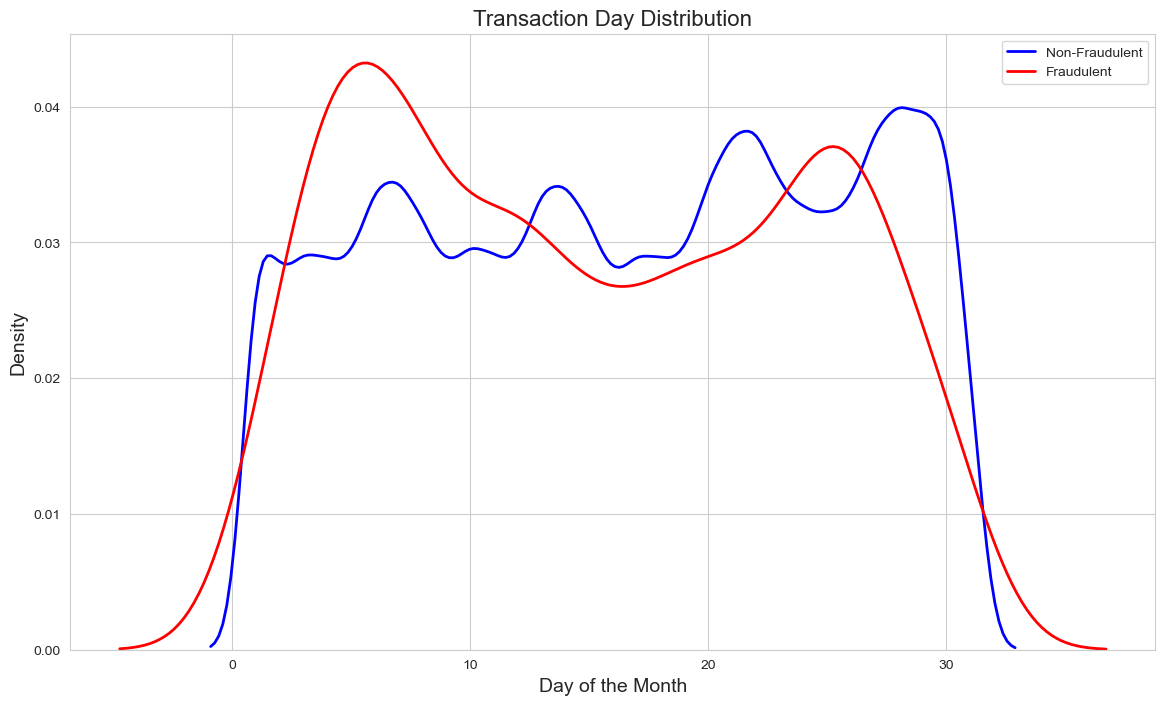

Correlation between transaction day and fraud: -0.01


In [73]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Improved Visualization: Transaction Day
plt.figure(figsize=(14, 8))

# Plot density plots
sns.kdeplot(df[df['is_fraud'] == 0]['transaction_day'], color='blue', label='Non-Fraudulent', lw=2)
sns.kdeplot(df[df['is_fraud'] == 1]['transaction_day'], color='red', label='Fraudulent', lw=2)

# Add title and labels
plt.title('Transaction Day Distribution', fontsize=16)
plt.xlabel('Day of the Month', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()

# Calculate correlation between transaction day and fraud
correlation = df['transaction_day'].corr(df['is_fraud'])

print(f"Correlation between transaction day and fraud: {correlation:.2f}")

Correlation between transaction amount and fraud: 0.18


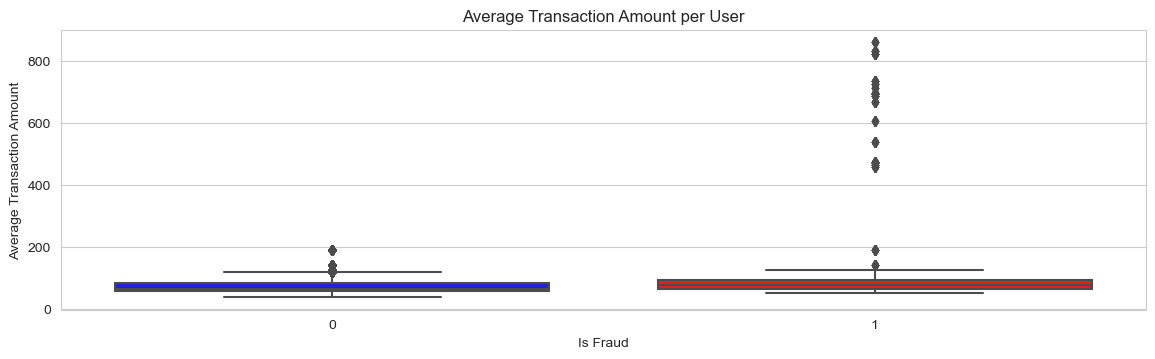

In [74]:
## Feature - cc_num and amt
# Calculate the average and total transaction amount per user
df['avg_trans_amount'] = df.groupby('cc_num')['amt'].transform('mean')
df['total_trans_amount'] = df.groupby('cc_num')['amt'].transform('sum')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualization: Average Transaction Amount per User
plt.figure(figsize=(14, 8))

# Boxplot
plt.subplot(2, 1, 1)
sns.boxplot(x='is_fraud', y='avg_trans_amount', data=df, palette={0: 'blue', 1: 'red'})
plt.title('Average Transaction Amount per User')
plt.xlabel('Is Fraud')
plt.ylabel('Average Transaction Amount')

# Calculate correlation between transaction amount ('amt') and fraud ('is_fraud')
correlation = df['amt'].corr(df['is_fraud'])

print(f"Correlation between transaction amount and fraud: {correlation:.2f}")

In [75]:
##  Feature - dob
# Assuming 'df' is your DataFrame containing transaction data
# Convert 'dob' to datetime and calculate age
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (pd.Timestamp.now() - df['dob']).astype('<m8[Y]')

# Define age groups (you can adjust these as per your specific age ranges)
bins = [0, 20, 30, 40, 50, 60, 100]  # Define your age bins here
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']  # Labels for age groups

# Assign age groups based on 'age' column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate correlation between age group and fraud
age_group_corr = df.groupby('age_group')['is_fraud'].mean()

print("Correlation between age group and fraud:")
print(age_group_corr)

ValueError: Cannot convert from timedelta64[ns] to timedelta64[Y]. Supported resolutions are 's', 'ms', 'us', 'ns'

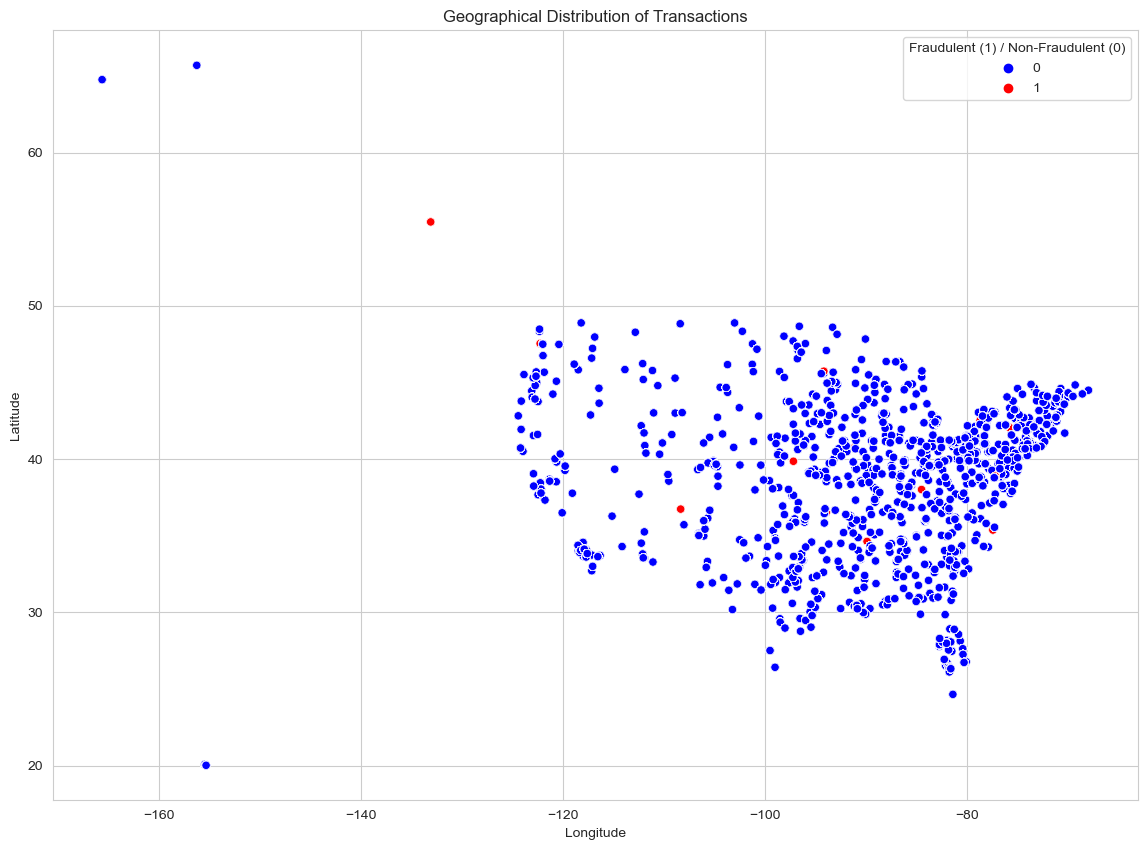

Text(0, 0.5, 'State')

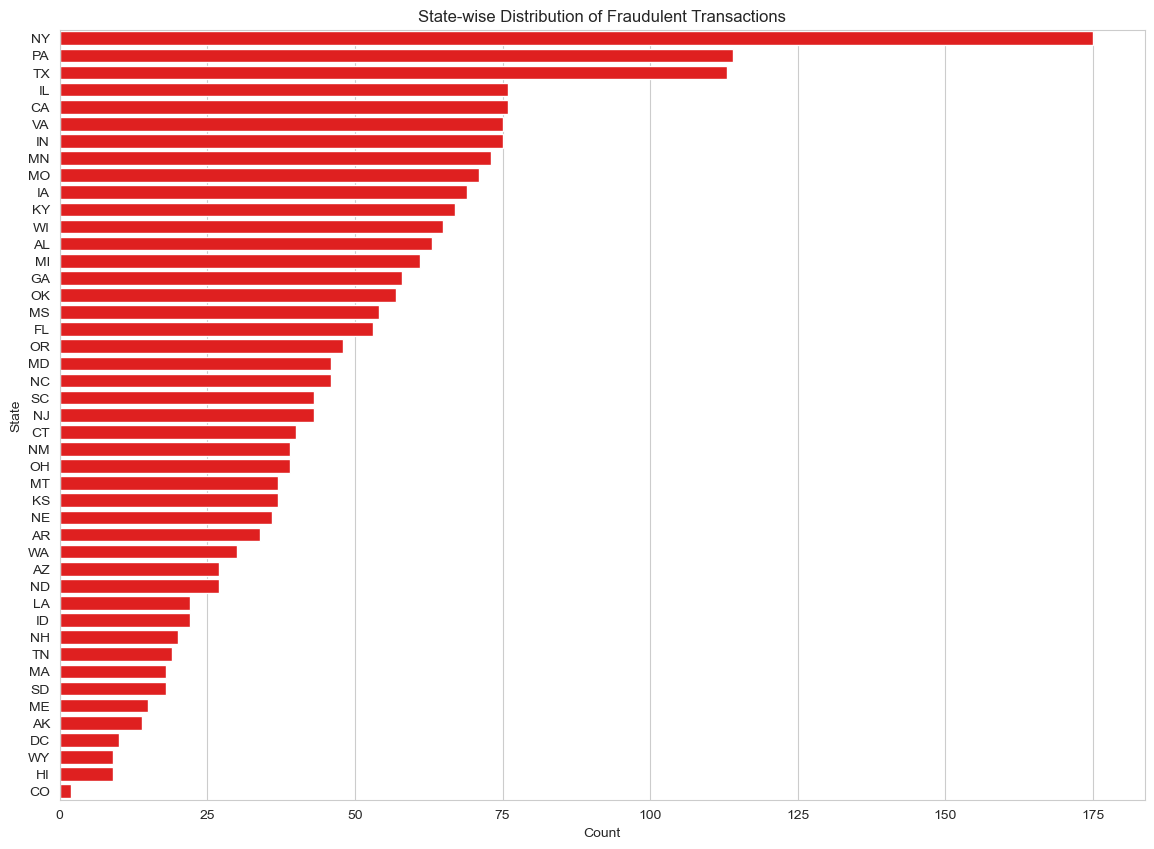

In [94]:
## Features - state, city , street
# Plot geographical distribution
plt.figure(figsize=(14, 10))
sns.scatterplot(x='long', y='lat', hue='is_fraud', palette=['blue', 'red'], data=df)
plt.title('Geographical Distribution of Transactions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fraudulent (1) / Non-Fraudulent (0)')
plt.show()


# Filter the dataset to include only fraudulent transactions
df_fraud = df[df['is_fraud'] == 1]

# Plot State-wise Distribution of Fraudulent Transactions
plt.figure(figsize=(14, 10))
sns.countplot(y='state', data=df_fraud, order=df_fraud['state'].value_counts().index, palette=['red'])
plt.title('State-wise Distribution of Fraudulent Transactions')
plt.xlabel('Count')
plt.ylabel('State')

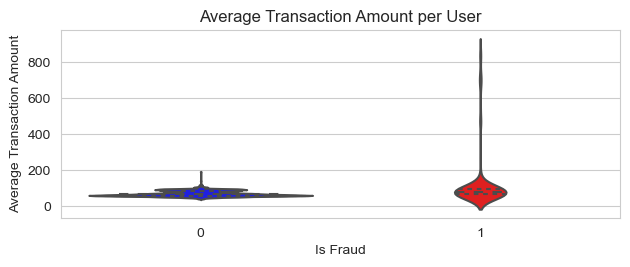

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [81]:
# Violin plot
plt.subplot(2, 1, 2)
sns.violinplot(x='is_fraud', y='avg_trans_amount', data=df, palette={0: 'blue', 1: 'red'}, inner='quartile')
plt.title('Average Transaction Amount per User')
plt.xlabel('Is Fraud')
plt.ylabel('Average Transaction Amount')

plt.tight_layout()
plt.show()

# Visualization: Total Transaction Amount per User
plt.figure(figsize=(14, 8))

# Outliers Handling

In [82]:
# Calculate quartiles
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]


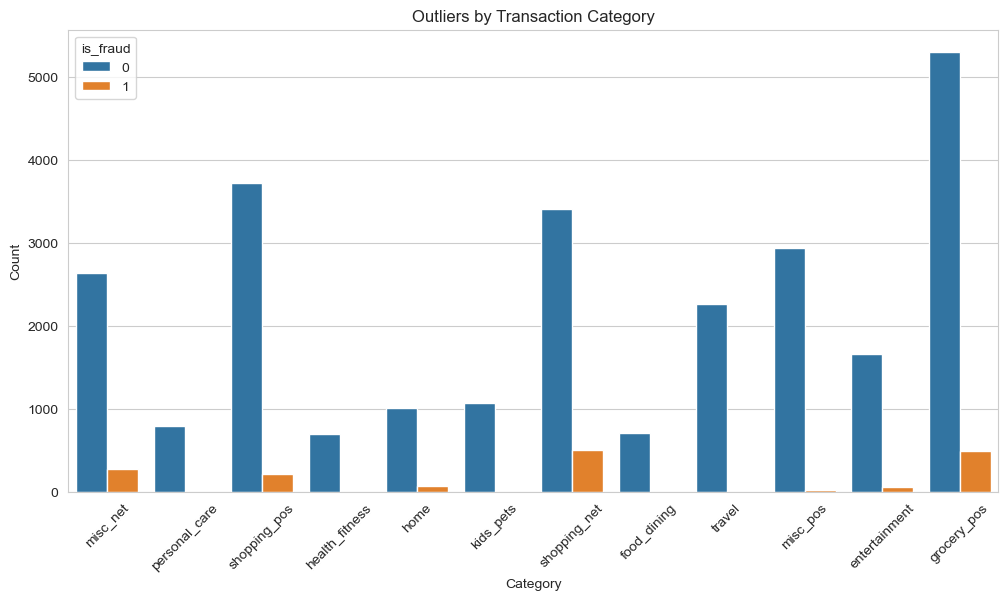

In [83]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=outliers)
plt.title('Outliers by Transaction Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

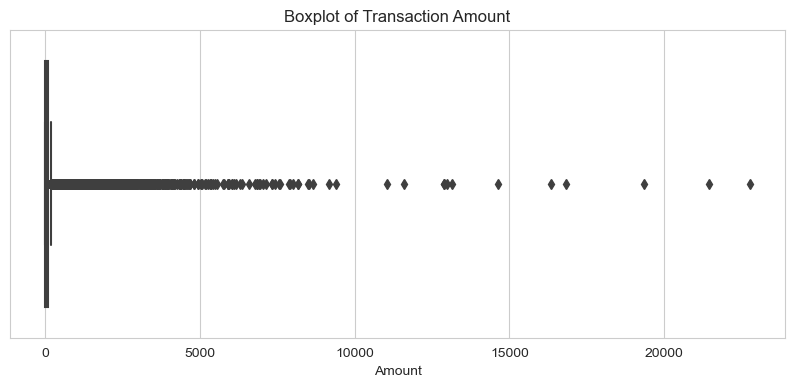

In [84]:
# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x='amt', data=df)
plt.title('Boxplot of Transaction Amount')
plt.xlabel('Amount')
plt.show()

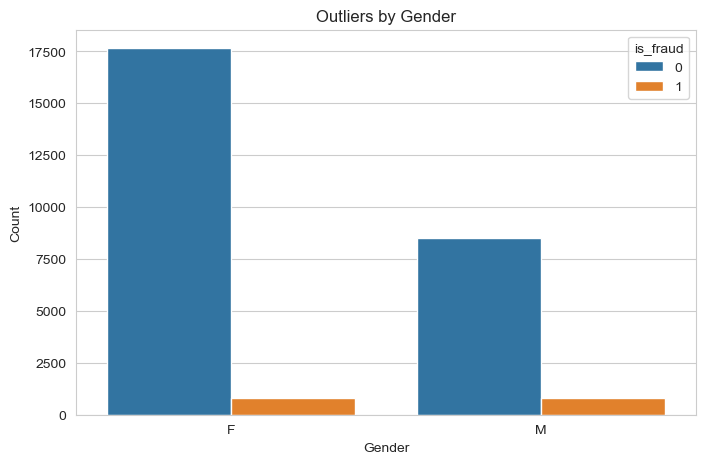

In [87]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='is_fraud', data=outliers)
plt.title('Outliers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [88]:
# Assuming 'outliers' DataFrame contains your identified outliers
# Calculate the total number of outliers
total_outliers = outliers.shape[0]

# Calculate the number of outliers that are fraud cases
fraud_outliers = outliers[outliers['is_fraud'] == 1].shape[0]

# Calculate the percentage of outliers that are fraud cases
percentage_fraud_outliers = (fraud_outliers / total_outliers) * 100

print(f"Total number of outliers: {total_outliers}")
print(f"Number of fraud cases among outliers: {fraud_outliers}")
print(f"Percentage of outliers that are fraud cases: {percentage_fraud_outliers:.2f}%")

Total number of outliers: 27778
Number of fraud cases among outliers: 1613
Percentage of outliers that are fraud cases: 5.81%


Text(0, 0.5, 'Count')

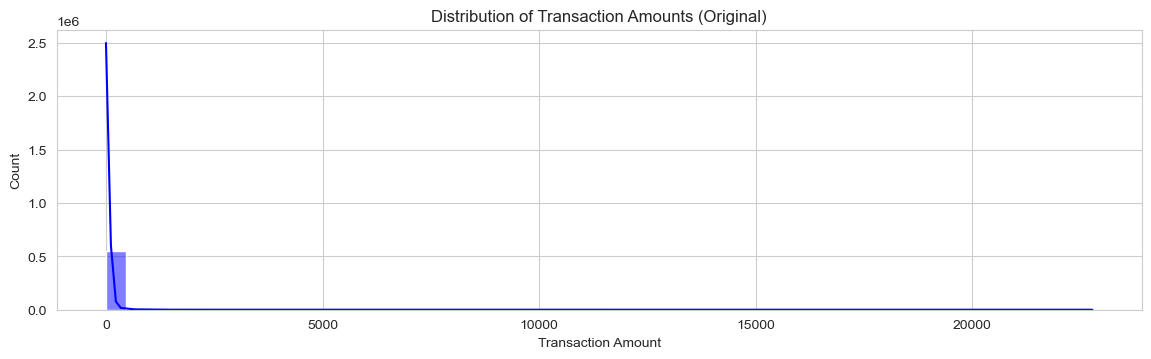

In [89]:
# Step 1: Evaluate Outlier Impact
plt.figure(figsize=(14, 8))

# Plot original distribution
plt.subplot(2, 1, 1)
sns.histplot(df['amt'], kde=True, bins=50, color='blue')
plt.title('Distribution of Transaction Amounts (Original)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

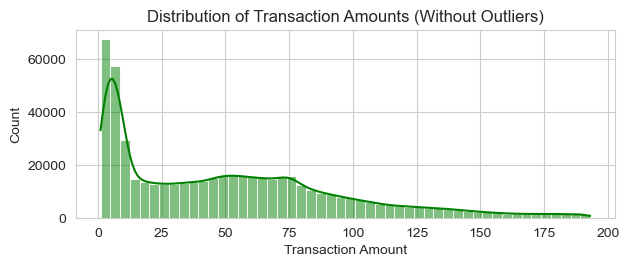

In [90]:
# Plot distribution without outliers
plt.subplot(2, 1, 2)
sns.histplot(df[~df.index.isin(outliers.index)]['amt'], kde=True, bins=50, color='green')
plt.title('Distribution of Transaction Amounts (Without Outliers)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

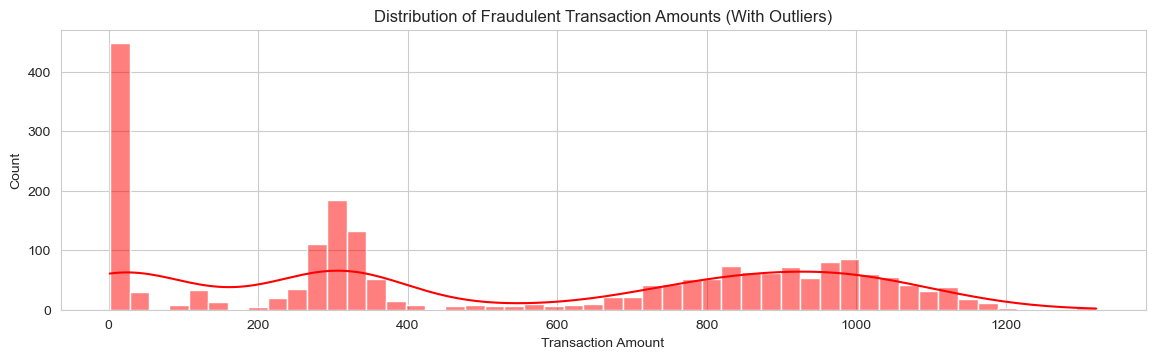

In [91]:
# Step 2: Consider Analysis Goals
# Example: If fraud detection is the goal, visualize fraudulent transactions with and without outliers
plt.figure(figsize=(14, 8))

# Plot fraudulent transactions with outliers
plt.subplot(2, 1, 1)
sns.histplot(df[df['is_fraud'] == 1]['amt'], kde=True, bins=50, color='red')
plt.title('Distribution of Fraudulent Transaction Amounts (With Outliers)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

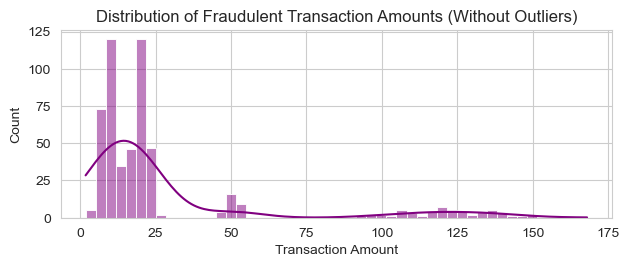

In [92]:
# Plot fraudulent transactions without outliers
plt.subplot(2, 1, 2)
sns.histplot(df[(df['is_fraud'] == 1) & (~df.index.isin(outliers.index))]['amt'], kde=True, bins=50, color='purple')
plt.title('Distribution of Fraudulent Transaction Amounts (Without Outliers)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

plt.tight_layout()
plt.show()